# **LOGISTIC REGRESSION**

# **1. Data Exploration**

In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('Titanic_train.csv')
test_df = pd.read_csv('Titanic_test.csv')

In [3]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#calculate the mean of the 'survived' column in the training dataset
mean_survived = train_df['Survived'].mean()
mean_survived

0.3838383838383838

In [6]:
#Create the 'survived' column in the test dataset and fill it with the mean
test_df['survived'] = mean_survived

In [7]:
#Merge the datasets
merged_data = pd.concat([train_df, test_df], ignore_index=True)

In [8]:
merged_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survived
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [9]:
# Examine the features, their types, and summary statistics
merged_info=merged_data.info()
df_summary=merged_data.describe()

merged_info,df_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  survived     418 non-null    float64
dtypes: float64(4), int64(4), object(5)
memory usage: 133.1+ KB


(None,
        PassengerId    Survived       Pclass          Age        SibSp  \
 count  1309.000000  891.000000  1309.000000  1046.000000  1309.000000   
 mean    655.000000    0.383838     2.294882    29.881138     0.498854   
 std     378.020061    0.486592     0.837836    14.413493     1.041658   
 min       1.000000    0.000000     1.000000     0.170000     0.000000   
 25%     328.000000    0.000000     2.000000    21.000000     0.000000   
 50%     655.000000    0.000000     3.000000    28.000000     0.000000   
 75%     982.000000    1.000000     3.000000    39.000000     1.000000   
 max    1309.000000    1.000000     3.000000    80.000000     8.000000   
 
              Parch         Fare      survived  
 count  1309.000000  1308.000000  4.180000e+02  
 mean      0.385027    33.295479  3.838384e-01  
 std       0.865560    51.758668  3.334660e-16  
 min       0.000000     0.000000  3.838384e-01  
 25%       0.000000     7.895800  3.838384e-01  
 50%       0.000000    14.45420

In [10]:
#finding missing values
merged_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
survived        891
dtype: int64

In [11]:
# Create visualizations such as histograms, box plots, or pair plots

In [12]:
merged_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'survived'],
      dtype='object')

In [13]:
num_col= [i for i in merged_data.columns if merged_data[i].dtype!='O']

In [14]:
num_col

['PassengerId',
 'Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'survived']

In [15]:
cat_col= [ i for i in merged_data.columns if merged_data[i].dtype=='O']

In [16]:
cat_col

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

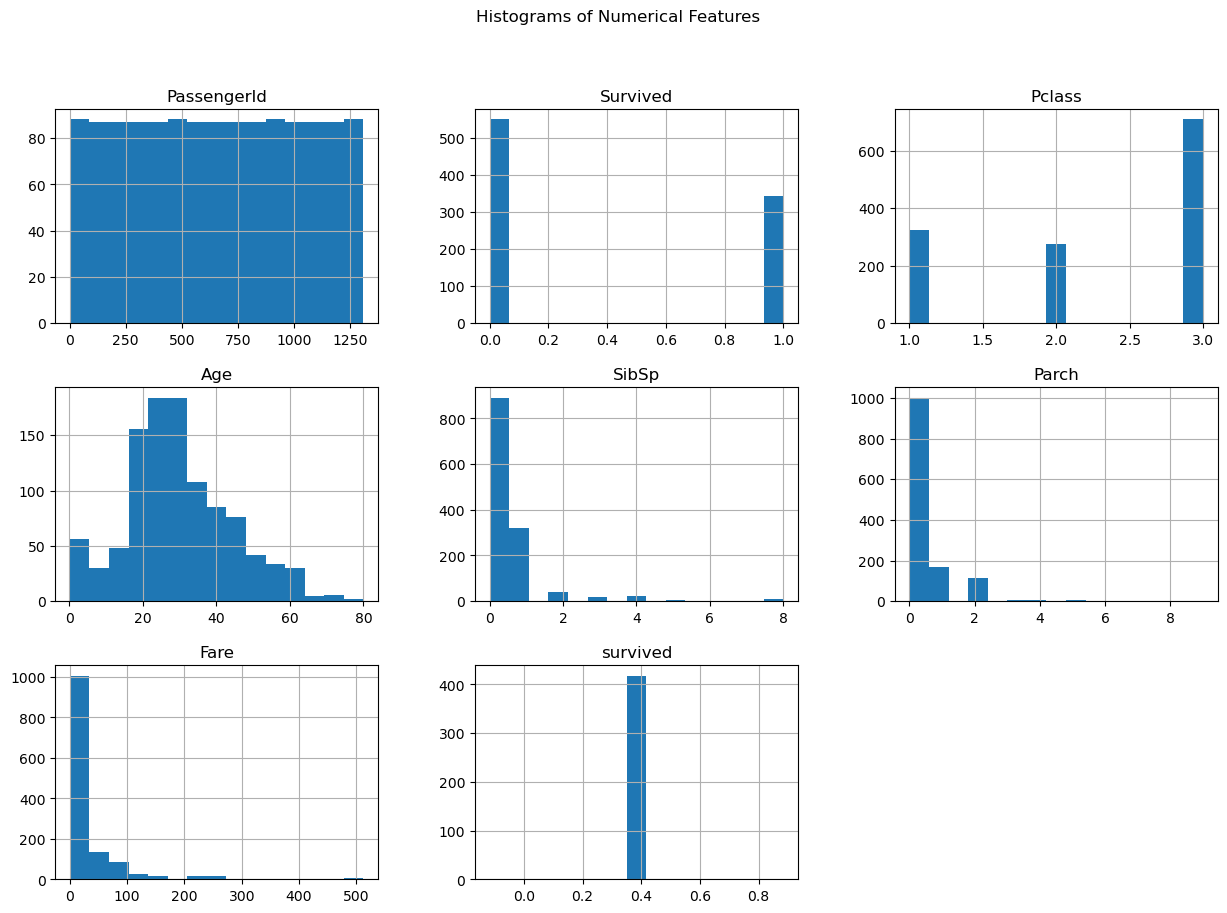

In [18]:
merged_data.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

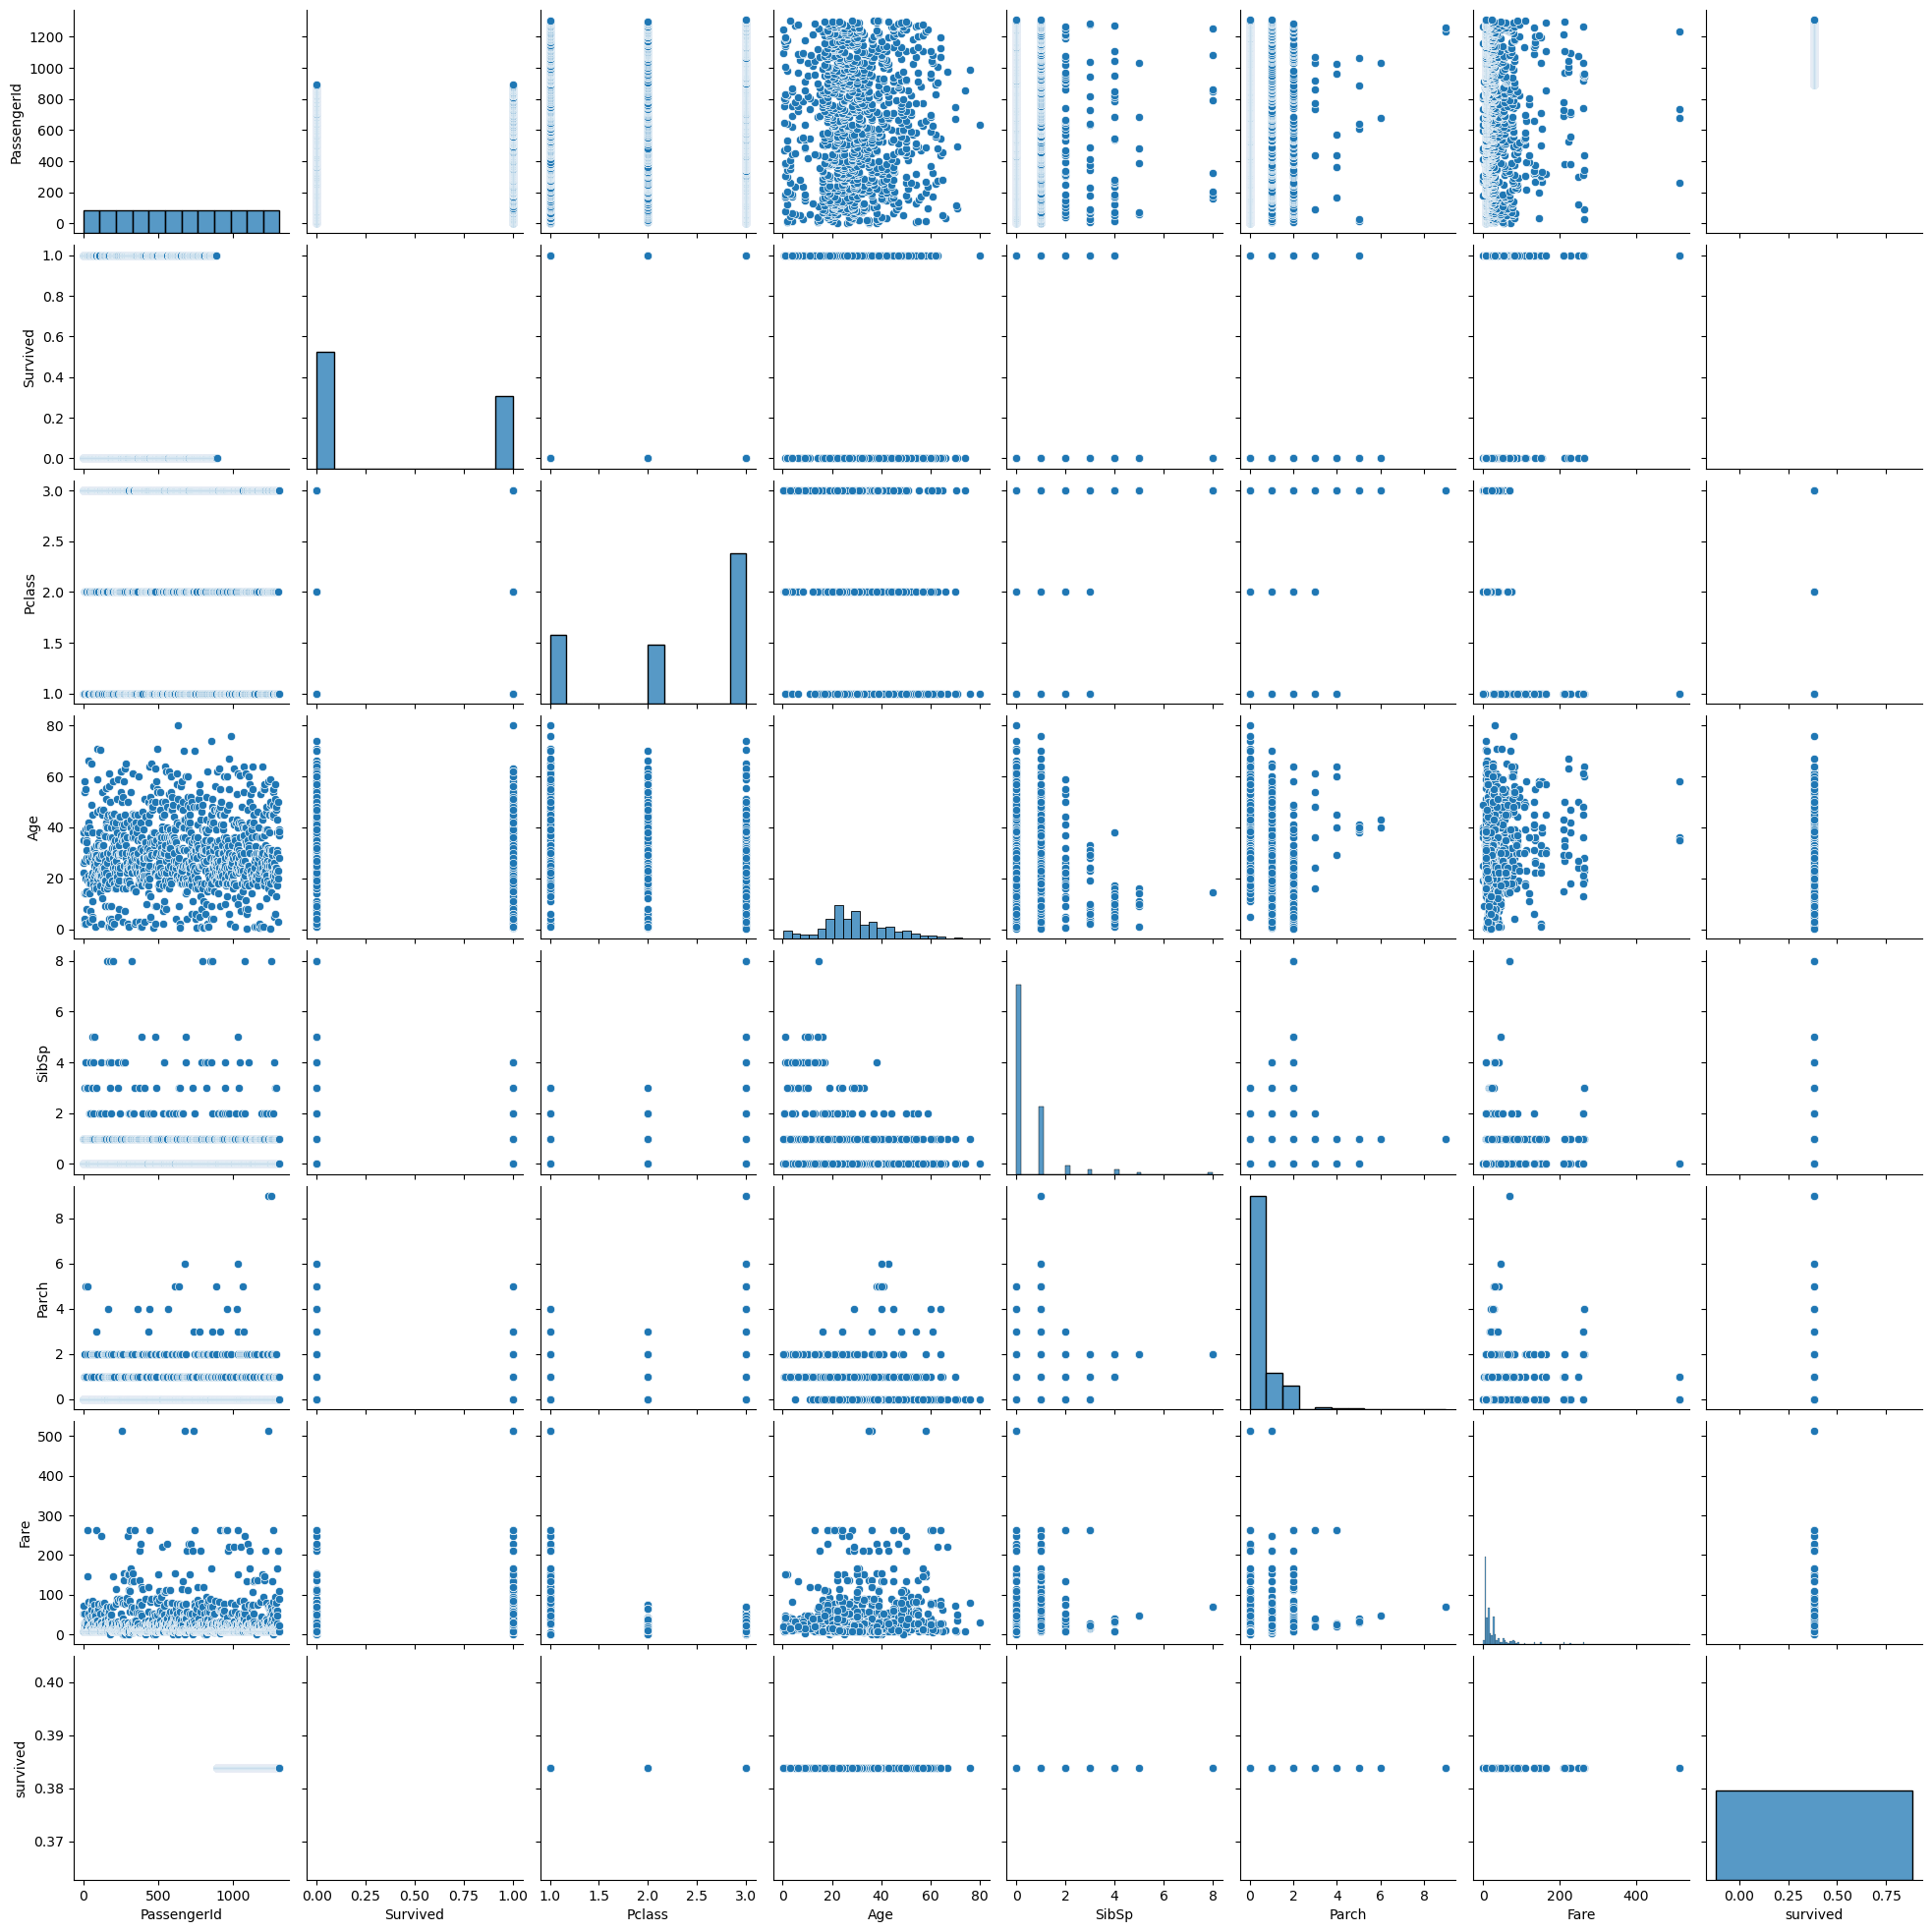

In [19]:
sns.pairplot(merged_data)
plt.show()

# **2.Data Preprocessing**

In [20]:
#Handling missing values
merged_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
survived        891
dtype: int64

In [21]:
num_col

['PassengerId',
 'Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'survived']

In [22]:
cat_col

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [24]:
# Create a SimpleImputer for numerical columns
num_imputer = SimpleImputer(strategy='mean')
num_imputer

SimpleImputer()

In [25]:
# Create a SimpleImputer for categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_imputer

SimpleImputer(strategy='most_frequent')

In [26]:
# Apply the SimpleImputer to numerical columns
merged_data[num_col] = num_imputer.fit_transform(merged_data[num_col])


In [27]:
# Apply the SimpleImputer to categorical columns
merged_data[cat_col] = cat_imputer.fit_transform(merged_data[cat_col])

In [28]:
#Encoding Technique
#apply labelencoder to cat col
le = LabelEncoder()
merged_data[cat_col] = merged_data[cat_col].apply(le.fit_transform)


In [29]:
merged_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
survived       0
dtype: int64

In [30]:
merged_data[cat_col] 

,Name,Sex,Ticket,Cabin,Embarked
0,155,1,720,80,2
1,286,0,816,106,0
2,523,0,914,80,2
3,422,0,65,70,2
4,22,1,649,80,2
...,...,...,...,...,...
1304,1126,1,711,80,2
1305,891,0,834,64,0
1306,1046,1,872,80,2
1307,1227,1,579,80,2


# **3.Model Building**

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [32]:
# define features and target
merged_data['Survived'] = merged_data['Survived'].astype(int)
x = merged_data.drop('Survived',axis=1)
y = merged_data['Survived']

In [33]:
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survived
0,1.0,3.0,155,1,22.000000,1.0,0.0,720,7.2500,80,2,0.383838
1,2.0,1.0,286,0,38.000000,1.0,0.0,816,71.2833,106,0,0.383838
2,3.0,3.0,523,0,26.000000,0.0,0.0,914,7.9250,80,2,0.383838
3,4.0,1.0,422,0,35.000000,1.0,0.0,65,53.1000,70,2,0.383838
4,5.0,3.0,22,1,35.000000,0.0,0.0,649,8.0500,80,2,0.383838
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305.0,3.0,1126,1,29.881138,0.0,0.0,711,8.0500,80,2,0.383838
1305,1306.0,1.0,891,0,39.000000,0.0,0.0,834,108.9000,64,0,0.383838
1306,1307.0,3.0,1046,1,38.500000,0.0,0.0,872,7.2500,80,2,0.383838
1307,1308.0,3.0,1227,1,29.881138,0.0,0.0,579,8.0500,80,2,0.383838


In [34]:
y

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: Survived, Length: 1309, dtype: int32

In [35]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [36]:
# Build a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# **4.Model Evaluation**

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve

In [38]:
#evaluate the model
y_pred = log_reg.predict(x_test)

In [39]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [40]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC score:", roc_auc_score(y_test, y_pred))

Accuracy: 0.8053435114503816
Precision: 0.7115384615384616
Recall: 0.5068493150684932
F1-score: 0.592
ROC-AUC score: 0.7137421178517069


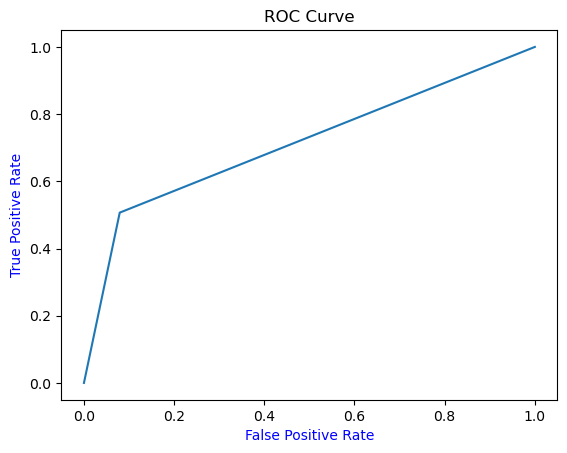

In [41]:
#visualize the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate",color="blue")
plt.ylabel("True Positive Rate",color="blue")
plt.title("ROC Curve")
plt.show()

# **5.Interpretation**

In [42]:
#Interpret the coefficients of the logistic regression model
log_reg.coef_

array([[-2.13117857e-03, -2.71996331e-01,  2.74092314e-04,
        -1.59454436e+00, -6.13143560e-03, -2.97030100e-01,
         2.47758653e-01, -3.49144414e-04,  5.68714004e-03,
         1.47522952e-02,  2.31930196e-02,  9.70882768e-02]])


#The significance of each feature in predicting survival probability:

*  High significance: Pclass, Sex, Cabin

* Medium significance: Age, Fare

* Low significance: Parch, SibSp, Ticket, Embarked

* No significance: PassengerId, Name


# **Interview Questions:**

1. What is the difference between precision and recall?

Precision measures the proportion of true positives among all positive predictions, focusing on how many predicted positives are correct.
Precision = True Positives / (True Positives + False Positives)

Recall measures the proportion of true positives among all actual positives, focusing on how many actual positives are identified.
Recall = True Positives / (True Positives + False Negatives)

2. What is cross-validation, and why is it important in binary classification?

Cross-validation is a technique where the dataset is split into k subsets, and the model is trained and tested on different combinations of these subsets.

In binary classification, it helps:

Reduce overfitting by testing the model on multiple data splits.

Provide a more reliable performance estimate.

Avoid bias by ensuring the model is evaluated on various data portions.